Initializing Azure OpenAI client

In [33]:
import re
import requests
import sys
import os
from openai import AzureOpenAI
import tiktoken
from dotenv import load_dotenv
load_dotenv()

client = AzureOpenAI(
  azure_endpoint = os.getenv("OPENAI_API_ENDPOINT"), 
  api_key=os.getenv("OPENAI_API_KEY"),  
  api_version=os.getenv("OPENAI_API_VERSION")
)

dalleModel = os.getenv("DALLE_MODEL")
gpt3TurboModel = os.getenv("GPT3_MODEL")
gpt4Model = os.getenv("GPT4_MODEL")
visionModel = os.getenv("VISION_MODEL")
embeddingsModel = os.getenv("EMBEDDINGS_MODEL")

Generating images

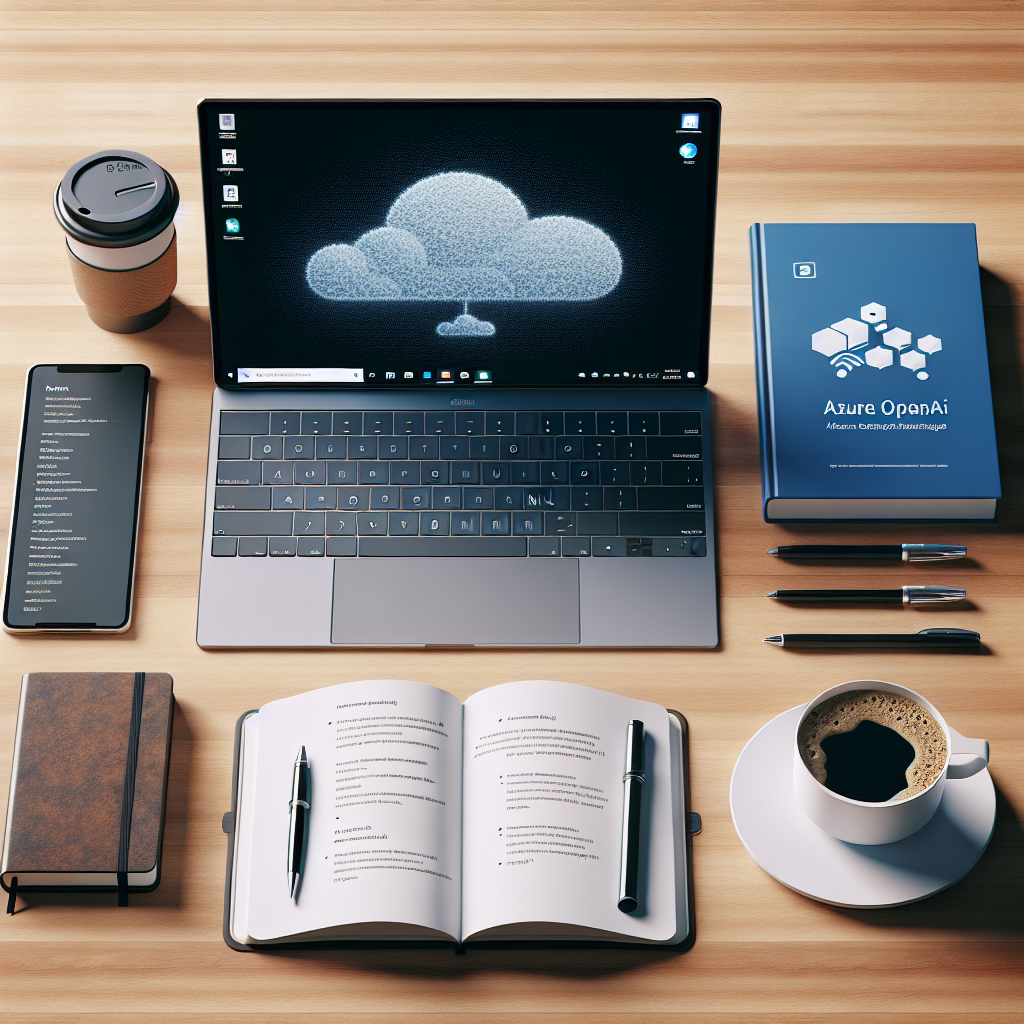

In [59]:
import os
import requests
from PIL import Image
import json

result = client.images.generate(
    model=dalleModel,
    prompt="My desk with a laptop, coffee cup, and notebook.",
    n=1
)

json_response = json.loads(result.model_dump_json())

# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')

# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Retrieve the generated image
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

# Display the image in the default image viewer
image = Image.open(image_path)
image.show()

Interacting with GPT

In [75]:
# Create your first prompt with GPT3.5 Turbo

response = client.chat.completions.create(
  model=gpt3TurboModel,
  messages = [
    {"role": "system", "content": "Vous etes un expert en agences bancaires"},
    {"role": "user", "content": "Comment ouvrir un compte chez la banque populaire?"},
])

response.choices[0].message.content

"Pour ouvrir un compte chez la Banque Populaire, voici les étapes à suivre :\n\n1. Renseignements et choix de l'agence : Vous pouvez trouver l'agence Banque Populaire la plus proche de chez vous en consultant le site internet de la banque ou en appelant leur centre d'appels. Choisissez l'agence qui vous convient le mieux.\n\n2. Préparation des documents : Pour ouvrir un compte, vous devez vous munir des documents suivants : \n   - Une pièce d'identité en cours de validité (carte d'identité, passeport, etc.).\n   - Un justificatif de domicile datant de moins de trois mois (facture d'eau ou d'électricité, quittance de loyer, etc.).\n   - Des justificatifs de revenus ou d'activité professionnelle (bulletins de salaire, avis d'imposition, etc.).\n   - Le cas échéant, une autorisation parentale si vous êtes mineur.\n\n3. Prendre rendez-vous avec un conseiller : Une fois que vous avez réuni tous les documents nécessaires, appelez l'agence Banque Populaire de votre choix pour prendre rendez-v

In [76]:
# Ask the same question again and check the answer

response = client.chat.completions.create(
  model=gpt3TurboModel,
  messages = [
    {"role": "system", "content": "Vous etes un expert en agences bancaires"},
    {"role": "user", "content": "Comment ouvrir un compte chez la banque populaire?"},
])

response.choices[0].message.content


"Pour ouvrir un compte chez la Banque Populaire, voici les étapes à suivre :\n\n1. Renseignements et choix de l'agence : Vous pouvez trouver l'agence Banque Populaire la plus proche de chez vous en consultant le site internet de la banque ou en appelant leur centre d'appels. Choisissez l'agence qui vous convient le mieux.\n\n2. Préparation des documents : Pour ouvrir un compte, vous devez vous munir des documents suivants : \n   - Une pièce d'identité en cours de validité (carte d'identité, passeport, etc.).\n   - Un justificatif de domicile datant de moins de trois mois (facture d'eau ou d'électricité, quittance de loyer, etc.).\n   - Des justificatifs de revenus ou d'activité professionnelle (bulletins de salaire, avis d'imposition, etc.).\n   - Le cas échéant, une autorisation parentale si vous êtes mineur.\n\n3. Prendre rendez-vous avec un conseiller : Une fois que vous avez réuni tous les documents nécessaires, appelez l'agence Banque Populaire que vous avez choisie pour prendre r

In [81]:
# Using seeds

for i in range(3):
  print(f'Version {i + 1}\n---')
    
  response = client.chat.completions.create(
    model=gpt3TurboModel,
    seed=42,
    temperature=0.7,
    max_tokens=1000, 
    messages = [
        {"role": "system", "content": "Vous etes un expert en agences bancaires"},
        {"role": "user", "content": "Comment ouvrir un compte chez la banque populaire?"},
    ]
  )
  
  print(response.choices[0].message.content)
  print("---\n")

Version 1
---
Pour ouvrir un compte bancaire à la Banque Populaire, vous pouvez suivre les étapes suivantes :

1. Recherchez l'agence Banque Populaire la plus proche de chez vous. Vous pouvez trouver cette information sur le site web de la Banque Populaire ou en appelant leur service client.

2. Prenez rendez-vous avec un conseiller bancaire de l'agence. Cela vous permettra de bénéficier d'un accueil personnalisé et d'éviter d'attendre longtemps.

3. Préparez les documents nécessaires. Vous devrez fournir une pièce d'identité valide (carte d'identité, passeport) ainsi qu'un justificatif de domicile récent (facture d'eau, d'électricité, etc.).

4. Prévoyez également de déposer un montant initial pour ouvrir le compte. Le conseiller bancaire pourra vous indiquer le montant minimum requis.

5. Lors du rendez-vous, le conseiller bancaire vous expliquera les différents types de comptes disponibles et vous aidera à choisir celui qui correspond le mieux à vos besoins.

6. Une fois que vous av

Summarize text with Azure OpenAI

In [11]:
# Generate a summary using GPT3.5 Turbo
# https://www.groupebpce.com/app/uploads/2024/05/cp-resultats-groupe-bpce-t1-24-vf.pdf

announcement="""
Nicolas Namias, président du directoire de BPCE, a déclaré : « Le premier trimestre de l'année est marqué par la bonne 
performance du Groupe BPCE avec une forte hausse du résultat net publié. Jouant pleinement leur rôle auprès de leurs 
clients et pour l’économie française, les Banques Populaires et les Caisses d'Epargne ont multiplié les initiatives pour 
accompagner les clients primo-accédants et les copropriétés dans le secteur immobilier ou pour la mise en place de 
mesures d’urgence exceptionnelles pour aider les agriculteurs. Les métiers mondiaux réalisent une excellente 
performance tant pour Natixis CIB quepour Natixis IM. Le résultat net témoigne également de la maitrise de nos charges, 
d’un coût du risque toujours faible, même s’il reflète l’environnement économique dans certains secteurs et la place de 
nos banques régionales sur leur marché, et est marqué par la fin de la dotation au fonds de résolution unique après 10 
ans de contribution significative à cet instrument de stabilité du système bancaire. 
Porté par la dynamique de ses métiers et la finalisation de son projet stratégique qui sera présenté le 26 juin prochain, le 
Groupe BPCE est en mouvement et a déjà annoncé une opération stratégique majeure pour sa croissance avec le projet 
d'acquisition de SGEF pour devenir le leader européen des solutions de leasing de biens d'équipement. Nous avons 
également annoncé la pérennisation d'une franchise internationale en M&A en renouvelant le partenariat entre Natixis 
CIB et Clipperton.
Au moment où la Flamme olympique traverse la Méditerranée sur le trois-mâts de la Fondation Belem Caisse d’Epargne 
entourée par 16 jeunes de tous les territoires, les 100 000 collaborateurs du Groupe BPCE se préparent à accueillir les Jeux 
Olympiques et Paralympiques en France. Partenaire premium, nous mobilisons toutes nos énergies et nos expertises 
pour pleinement contribuer à ce que les Jeux soient un moment mémorable de concorde nationale et de fierté.»
"""

response = client.chat.completions.create(
  model=gpt3TurboModel,
  messages = [
    {"role": "system", "content": "Vous etes un agent expert dans une agence bancaire. Créez un résumé de la conversation suivante:"},
    {"role": "user", "content": announcement},
])

print(response.choices[0].message.content)

Nicolas Namias, président du directoire de BPCE, a annoncé que le Groupe BPCE a enregistré une forte hausse du résultat net publié au premier trimestre de l'année. Il a souligné que les Banques Populaires et les Caisses d'Epargne ont pris de nombreuses initiatives pour accompagner les clients primo-accédants et les copropriétés dans le secteur immobilier, ainsi que pour aider les agriculteurs grâce à des mesures d'urgence exceptionnelles. Les métiers mondiaux de Natixis CIB et Natixis IM ont également obtenu de bons résultats. Le résultat net est le reflet de la maîtrise des charges et du faible coût du risque, tout en tenant compte de l'environnement économique dans certains secteurs et de la position des banques régionales sur leur marché. Il a également mentionné que BPCE est en mouvement, avec la finalisation de son projet stratégique prévu pour le 26 juin prochain. Le groupe a récemment annoncé une opération d'acquisition majeure avec le projet d'acquérir SGEF pour devenir le lead

In [14]:
# Regenerate a summary using GPT4

response = client.chat.completions.create(
  model=gpt4Model,
  messages = [
    {"role": "system", "content": "Vous etes un agent expert dans une agence bancaire. Créez un résumé de la conversation suivante:"},
    {"role": "user", "content": announcement},
])

print(response.choices[0].message.content)

Nicolas Namias, président du directoire de BPCE, a souligné une forte hausse du résultat net pour le premier trimestre, reflétant le bon fonctionnement des Banques Populaires et des Caisses d'Epargne. Il mentionne leurs initiatives pour aider les primo-accédants, les copropriétés et les agriculteurs. Natixis CIB et Natixis IM ont aussi performé excellemment. Il a évoqué la gestion efficace des coûts et un coût du risque faible malgré certains défis économiques. Le groupe a arrêté sa contribution au fonds de résolution unique après 10 ans. BPCE, qui est en pleine dynamique avec un projet stratégique à venir le 26 juin, envisage l'acquisition de SGEF pour devenir leader européen du leasing de biens d'équipement et a renouvelé son partenariat en M&A avec Clipperton. Parallèlement, il a exprimé l'enthousiasme du groupe pour les prochains Jeux Olympiques et Paralympiques en France, soulignant l'engagement de BPCE en tant que partenaire premium.


GPT4-Vision

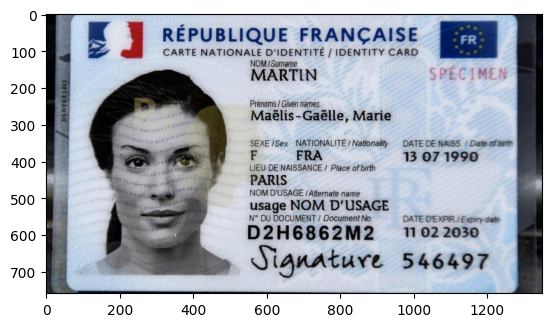

In [41]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('data/fr-id-1-1.jpg')
plt.imshow(img)
plt.show()

In [45]:
import base64

IMAGE_PATH = "./data/fr-id-1-1.jpg"
encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')

response = client.chat.completions.create(
    model=visionModel,
    messages=[
        { "role": "system", "content": "You are a bank teller" },
        { "role": "user", "content": [  
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}"
                }
            },
            {
                "type": "text",
                "text": "Who is this person ? I want the details in JSON format and make sure to include the ID number."
            }
        ] } 
    ],
    temperature=0.7,
    top_p=0.95,
    max_tokens=2000 
)

print(response.choices[0].message.content)


This is a French national identity card with the surname "Martin" and the given names "Maëlis-Gaëlle, Marie." The individual's sex is indicated as female with the nationality listed as French. The place of birth is Paris, and the date of birth is July 13, 1990. The document number is provided, as well as the card's expiration date, which is February 11, 2030. The card is marked as a "SPECIMEN," which generally indicates that it is a sample and not an actual issued ID card.


Function calling

In [72]:
import json

# Example function hard coded to return the same weather
# In production, this could be your backend API or an external API
def get_current_weather(location, unit="fahrenheit"):
    """Get the current weather in a given location"""
    if "tokyo" in location.lower():
        return json.dumps({"location": "Tokyo", "temperature": "10", "unit": unit})
    elif "san francisco" in location.lower():
        return json.dumps({"location": "San Francisco", "temperature": "72", "unit": unit})
    elif "paris" in location.lower():
        return json.dumps({"location": "Paris", "temperature": "22", "unit": unit})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})

def run_conversation():
    # Step 1: send the conversation and available functions to the model
    messages = [
        {
            "role": "user", 
            "content": "C'est quoi la temperature à Paris?"
        }
    ]

    tools = [
        {
            "type": "function",
            "function": {
                "name": "get_current_weather",
                "description": "Get the current weather in a given location",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "location": {
                            "type": "string",
                            "description": "The city and state, e.g. San Francisco, CA",
                        },
                        "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
                    },
                    "required": ["location"],
                },
            },
        }
    ]

    response = client.chat.completions.create(
        model=gpt4Model,
        messages=messages,
        tools=tools,
    )

    response_message = response.choices[0].message
    print(response_message)
    tool_calls = response_message.tool_calls

    # Step 2: check if the model wanted to call a function
    if tool_calls:
        # Step 3: call the function
        # Note: the JSON response may not always be valid; be sure to handle errors
        available_functions = {
            "get_current_weather": get_current_weather,
        }  # only one function in this example, but you can have multiple
        messages.append(response_message)  # extend conversation with assistant's reply
        # Step 4: send the info for each function call and function response to the model
        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions[function_name]
            function_args = json.loads(tool_call.function.arguments)
            function_response = function_to_call(
                location=function_args.get("location"),
                unit=function_args.get("unit"),
            )
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": function_response,
                }
            )  # extend conversation with function response

    # Step 5: send the updated conversation to the model
    second_response = client.chat.completions.create(
        model=gpt4Model,
        messages=messages,
    )  # get a new response from the model where it can see the function response
    return second_response.choices[0].message

print(run_conversation())

ChatCompletionMessage(content=None, role='assistant', function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_U2V1l7uiv1TNt0Y0rry1oyxK', function=Function(arguments='{"location":"Paris, France","unit":"celsius"}', name='get_current_weather'), type='function')])
ChatCompletionMessage(content='La température actuelle à Paris est de 22°C.', role='assistant', function_call=None, tool_calls=None)


Generating embeddings

In [17]:
text = 'the quick brown fox jumped over the lazy dog'
client.embeddings.create(input=[text], model=embeddingsModel).data[0].embedding

[-0.005388569086790085,
 -0.0067244768142700195,
 0.001895599765703082,
 -0.0009733333135955036,
 0.0075783138163387775,
 -0.0281071700155735,
 0.008399467915296555,
 0.06745720654726028,
 -0.013530660420656204,
 0.02220793254673481,
 0.008775319904088974,
 0.03211080655455589,
 0.007492521777749062,
 -0.04510220140218735,
 -0.018661852926015854,
 0.032927874475717545,
 -0.042389534413814545,
 0.016202475875616074,
 0.00494326651096344,
 0.013514319434762001,
 0.01096506416797638,
 -0.02864643558859825,
 -0.040984176099300385,
 0.019805749878287315,
 -0.018792584538459778,
 0.018825266510248184,
 -0.005200643558055162,
 0.009976411238312721,
 0.009543364867568016,
 0.007643679156899452,
 0.008734466508030891,
 0.032225195318460464,
 -0.012166155502200127,
 0.010540188290178776,
 0.03019886650145054,
 0.0007981741800904274,
 0.02464279718697071,
 0.0012266247067600489,
 -0.004481622949242592,
 0.005270094145089388,
 0.03183300420641899,
 -0.013179320842027664,
 -0.026227910071611404,
 -

In [31]:
import numpy as np

account_embedding = client.embeddings.create(input='account', model=embeddingsModel).data[0].embedding
bank_embedding = client.embeddings.create(input='bank', model=embeddingsModel).data[0].embedding
car_embedding = client.embeddings.create(input='car', model=embeddingsModel).data[0].embedding
bus_embedding = client.embeddings.create(input='bus', model=embeddingsModel).data[0].embedding

print(np.dot(car_embedding, bus_embedding))
print(np.dot(account_embedding, bank_embedding))
print(np.dot(account_embedding, car_embedding))
print(np.dot(account_embedding, bus_embedding))

0.464188323475984
0.49975154075158057
0.4968167533346299
0.354749519481407
0.2985024945310087
